#IRIS FLOWER CLASSIFICATION



#Instructions:

In [2]:
#Importing important libraries and reading dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reeding file
df=pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Getting the shape of dataset
df.shape

(150, 5)

In [5]:
#Getting the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#Getting the duplicates
df.duplicated().sum()

3

In [7]:
#Getting the Null values
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [8]:
#Getting the EDA
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


* Making a copy of the original data to prevent any inconvenience

In [9]:
df1 = df.copy()

#Initiated Data Cleaning process....

Insights: No null values, no need to change data type, only 3 duplicate values

In [11]:
#Handling the duplicates
df1.drop_duplicates(inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [12]:
#checking duplicates
df1.duplicated().sum()

0

#Performing Exploratory Data Analysis(EDA) on cleaned data

Resetting the index

In [13]:
df1.reset_index(drop=True, inplace=True)
df1.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
#Getting new EDA after removing duplicates
df1.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
#Import stats and perform Z-score
import scipy.stats as stats
df1 = df1[(np.abs(stats.zscore(df1[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], nan_policy='omit')) < 3).all(axis=1)]
df1.shape

(146, 5)

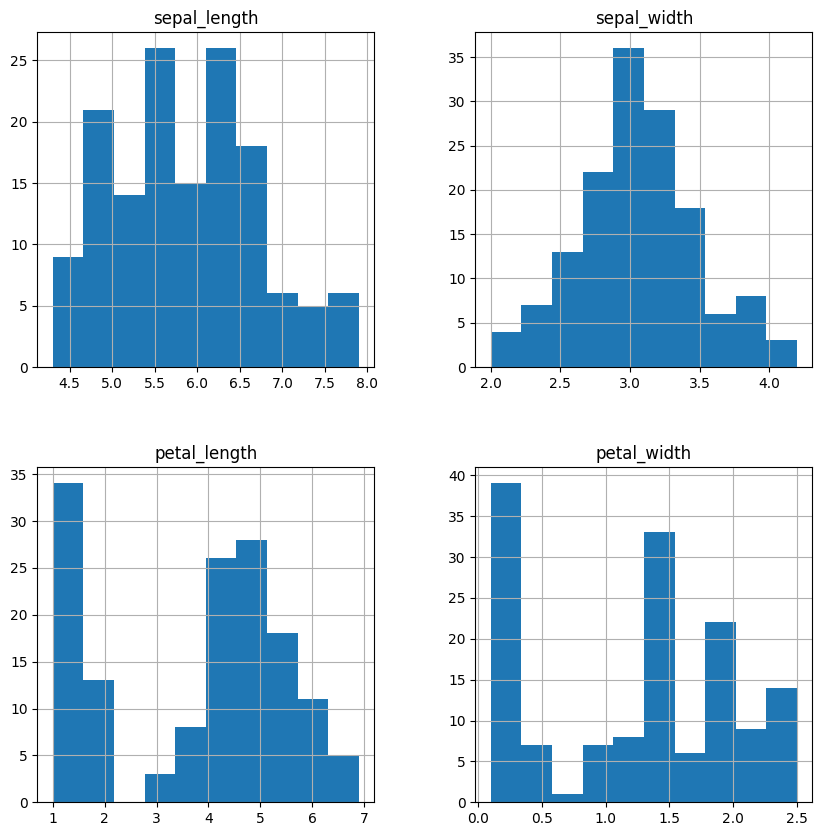

In [16]:
#check distribution using histogram
df1.hist(figsize=(10,10))
plt.show()

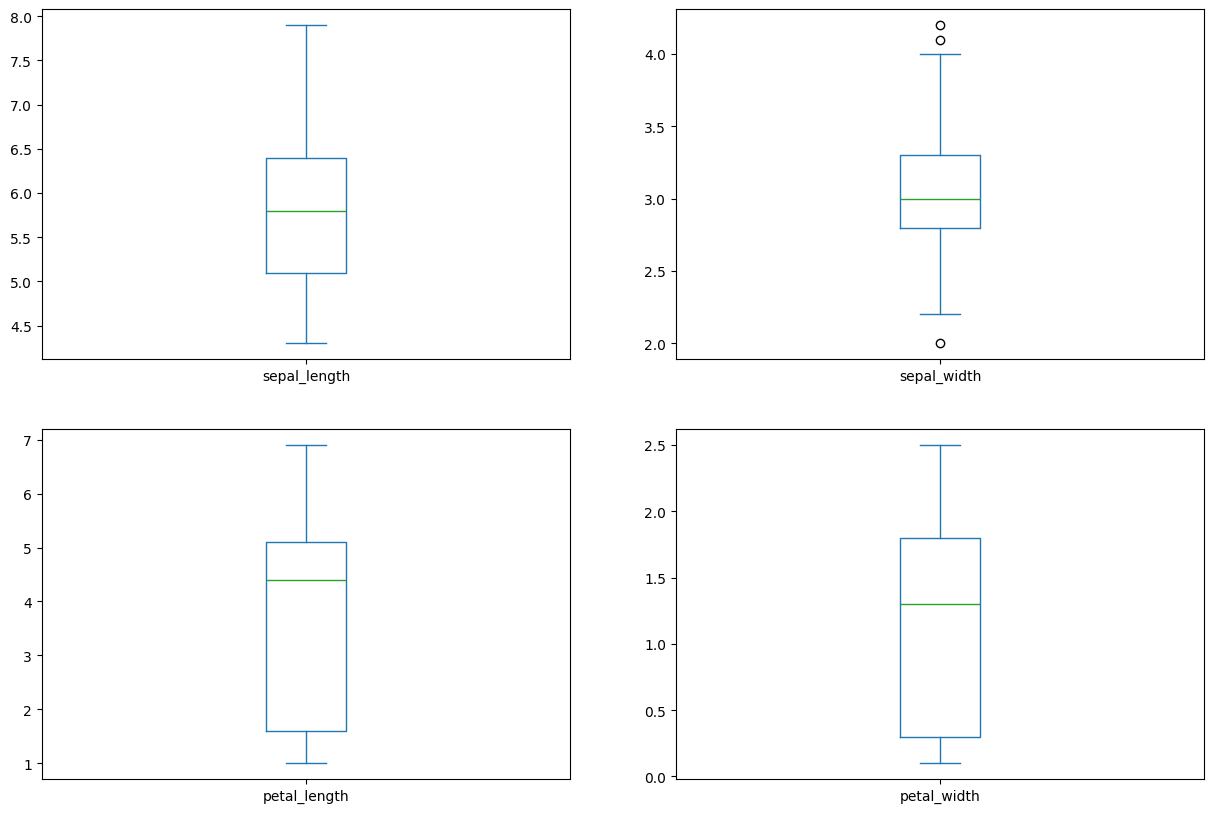

In [17]:
#check outliers using boxplot
df1.plot(kind='box',subplots=True,layout=(2,2),figsize=(15,10))
plt.show()

Insights: 'sepal_length' and 'sepal_width' Show a Symmetrical, Bell-Curve (Normal) Distribution"

In [20]:
#Performing the violin plot
import plotly.express as px
fig = px.violin(data_frame=df1, x="petal_length")
fig.show()

In [21]:
#Performing the violin plot
import plotly.express as px
fig = px.violin(data_frame=df1, x="petal_width")
fig.show()

#Preprocessing

In [23]:
from sklearn.preprocessing import LabelEncoder

#Encoding the species
y = df1['species']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#Identify outliers using the IQR method
Q1 = df1['sepal_width'].quantile(0.25)
Q3 = df1['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter out the outliers
df1 = df1[(df1['sepal_width'] >= lower_bound) & (df1['sepal_width'] <= upper_bound)]

df1.head(), y_encoded[:5]

(   sepal_length  sepal_width  petal_length  petal_width      species
 0           5.1          3.5           1.4          0.2  Iris-setosa
 1           4.9          3.0           1.4          0.2  Iris-setosa
 2           4.7          3.2           1.3          0.2  Iris-setosa
 3           4.6          3.1           1.5          0.2  Iris-setosa
 4           5.0          3.6           1.4          0.2  Iris-setosa,
 array([0, 0, 0, 0, 0]))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Importing StandardScaler and MinMaxScaler

#Separating features and target variable
X = df1.drop('species', axis=1)
y = df1['species']

#Standardizing the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)

#Normalizing the data
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X)
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

X_standardized_df.head(), X_normalized_df.head()

(   sepal_length  sepal_width  petal_length  petal_width
 0     -0.926103     1.163072     -1.393237    -1.370894
 1     -1.166453    -0.096923     -1.393237    -1.370894
 2     -1.406803     0.407075     -1.450554    -1.370894
 3     -1.526978     0.155076     -1.335921    -1.370894
 4     -1.046278     1.415071     -1.393237    -1.370894,
    sepal_length  sepal_width  petal_length  petal_width
 0      0.222222     0.722222      0.067797     0.041667
 1      0.166667     0.444444      0.067797     0.041667
 2      0.111111     0.555556      0.050847     0.041667
 3      0.083333     0.500000      0.084746     0.041667
 4      0.194444     0.777778      0.067797     0.041667)

#Model Building

In [27]:
from sklearn.model_selection import train_test_split # Importing train_test_split
from sklearn.linear_model import LogisticRegression # Importing LogisticRegression
from sklearn.metrics import accuracy_score, classification_report # Importing accuracy_score and classification_report

#Split the standardized data
X_train, X_test, y_train, y_test = train_test_split(X_standardized_df, y, test_size=0.2, random_state=42)

#Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('\nClassifi. Report:',classification_rep)

Accuracy: 0.896551724137931

Classifi. Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        29
      macro avg       0.91      0.90      0.90        29
   weighted avg       0.90      0.90      0.90        29



In [31]:
from sklearn.neighbors import KNeighborsClassifier #Import the class
from sklearn.model_selection import cross_val_score #Import cross_val_score

#Initialize KNN classifier
knn = KNeighborsClassifier()

#Create y_encoded after outlier removal to ensure consistency
y_encoded = label_encoder.fit_transform(df1['species']) # Re-encode y using the filtered DataFrame

#5-fold cross-validation
knn_cv_scores = cross_val_score(knn, X_standardized_df, y_encoded, cv=5, scoring='accuracy')

#mean accuracy across folds
knn_cv_mean_accuracy = knn_cv_scores.mean()
knn_cv_mean_accuracy

0.9440886699507388

In [33]:
from sklearn.neighbors import KNeighborsClassifier #Import the class
from sklearn.model_selection import cross_val_score, GridSearchCV #Import cross_val_score and GridSearchCV

#range of 'n_neighbors'
param_grid = {'n_neighbors': range(1, 21)}

#Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_standardized_df, y_encoded)

#the best parameters & corresponding accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validated Accuracy:", best_score)

Best Parameters: {'n_neighbors': 8}
Best Cross-Validated Accuracy: 0.9578817733990148


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized_df, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

#KNN model (with n_neighbors=8)
best_knn_model = KNeighborsClassifier(n_neighbors=8)
best_knn_model.fit(X_train_std, y_train)

#Predict on the test set
y_pred_knn = best_knn_model.predict(X_test_std)

#Evaluate accuracy and classification report
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print("Test Accuracy:", accuracy_knn)
print("\nClassification Report:\n", classification_rep_knn)

Test Accuracy: 0.8620689655172413

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.77      0.91      0.83        11
 Iris-virginica       0.88      0.70      0.78        10

       accuracy                           0.86        29
      macro avg       0.88      0.87      0.87        29
   weighted avg       0.87      0.86      0.86        29



#Insights

For Iris-setosa, the model performs very well; for Iris-versicolor, it performs mediocrely; and for Iris-virginica, it performs mediocrely. Although the weighted averages point to a strong overall performance.